### 마케팅 전략을 정의하기 위해 고객 세분화를 개발해야 한다
* 샘플 데이터 집합은 지난 6개월 동안 9000건에 대한 신용 카드 소지자의 사용 동작을 요약한 것이다
* 이 파일은 18개의 행동변수(feature)가 있는 고객정보가 있다
>
* 컬럼
    - CUST_ID : 신용 카드 소지자 식별
    - BALANCE : 구매를 위해 계정에 남아 있는 잔액
    - BALANCE_FREQUENCY : 잔액이 업데이트되는 빈도, 0에서 1사이의 점수(1=자주, 0=자주 업데이트하지 않음)
    - PURCHASES : 계정에서 구매 한 금액
    - ONEOFF_PURCHASES : 1회 최대 구매 금액
    - INSTALLMENTS_PURCHASES : 분할 구매한 금액
    - CASH_ADVANCE : 사용자가 선불로 지급한 현금
    - PURCHASES_FREQUENCY : 구매가 이루어지는 빈도, 0에서 1 사이의 점수(1 = 자주 구매, 0 = 자주 구매하지 않음)
    - ONEOFF_PURCHASES_FREQUENCY : 한 번에 구매가 발생하는 빈도(1 = 자주 구매, 0 = 자주 구매하지 않음)
    - PURCHASES_INSTALLMENTS_FREQUENCY : 할부구매가 이루어지는 빈도(1 = 자주, 0 = 자주하지 않음)
    - CASH_ADVANCE_FREQUENCY : 선지급되는 현금의 빈도
    - CASH_ADVANCE_TRX : 선불결제로 이루어진 거래 횟수
    - PURCHASES_TRX : 구매 거래 횟수 made
    - CREDIT_LIMIT : 사용자 PAYMENTS에 대한 신용 카드 한도
    - PAYMENTS : 사용자가 지불한 금액
    - MINIMUM_PAYMENTS : 사용자가 지불한 최소 금액
    - PRC_FULL_PAYMENT : 사용자가 지불한 전체 지불 비율
    - TENURE : 사용자에 대한 신용 카드 서비스 사용 기간

### 데이터 셋 로드

In [82]:
import pandas as pd
df = pd.read_csv('data/card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 전처리

#### 결측치 확인

In [83]:
print(df.shape)
df.isnull().sum()

(8950, 18)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### 결측치 중앙값으로 치환

In [84]:
#df = df.fillna(0)
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df.isnull().sum()
# 중앙값으로 처리 후 확인결과 nan값은 존재 하지 않는다

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### 데이터 타입 확인

In [85]:
df.dtypes
# 확인결과 문자열은 cust_id빼고 존재 하지 않는다

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [86]:
# 이상치 확인하기 전에 id값은 문자열이고 필요없으므로 삭제하고 진행하자
df_copy = df.drop('CUST_ID', axis = 1)
print(df.columns)
df_copy.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

#### 중복데이터 확인

In [87]:
df_copy.duplicated().sum()
#중복 데이터가 존재한다면 삭제해야 한다
#df.drop_duplicates(inplace=True)
#df.duplicated().sum()

0

### StandardScaler

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit( df_copy )
df_scaler = scaler.transform(df_copy)

### KMeans

#### cluster 개수 그래프로 확인

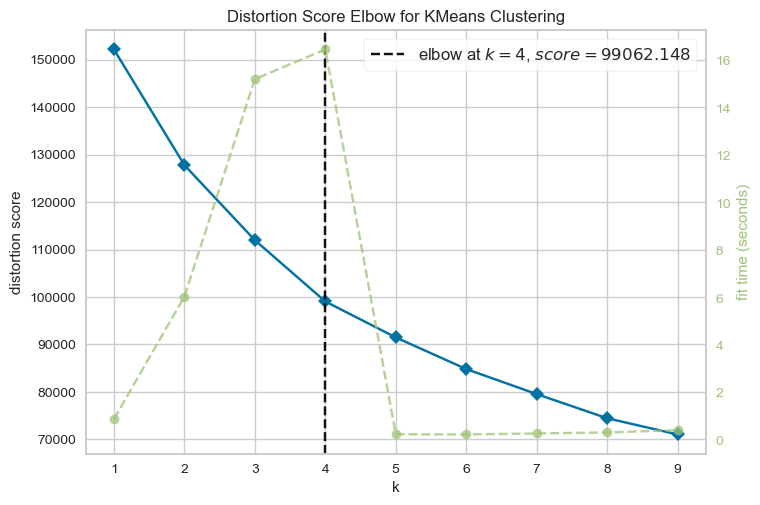

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

km = KMeans()

ke = KElbowVisualizer(km, k=(1,10))
ke.fit(df_scaler)
ke.show()

#### silhouette_score 확인

In [90]:
from sklearn.metrics import silhouette_score
all_scores = []

i = 1 # 클러스터 개수
while i < 10:
    i += 1 #클러스터 개수 1씩 증가
    km = KMeans(n_clusters = i ) #클러스터 개수를 1씩 증가하며 모델 생성
    km.fit( df_scaler )
    #클러스터 label값이 1개일 경우 점수, 2개일경우 점수....10개일경우 점수를 각각 뽑는다
    sil_score = silhouette_score(df_copy, km.labels_) #labels : 각 클러스터의 값을 저장하고 있다
    score_dic = {'cluster_num':i, 'sil_score':sil_score}
    all_scores.append(score_dic)
score_df = pd.DataFrame(all_scores)

In [91]:
score_df.sort_values('sil_score', ascending=False)
#평가 점수는 군집화2개로 되었을경우가 51이 된다.

,cluster_num,sil_score
1,3,0.341852
0,2,0.076614
2,4,0.043307
4,6,0.005516
3,5,0.000656
8,10,-0.043481
7,9,-0.054925
5,7,-0.060856
6,8,-0.064593


* 그래프와 실루엣 점수로 확인해본 결과 그래프는 4, 실루엣은 3으로 서로 다른 군집의 개수를 표현해 준다
* 3개가 좋을지 4개가 좋을지는 그래프로 각 값들을 확인 후 설정하는게 좋다
* 우리는 4개의 그룹으로 지정하여 사용할 것이다

### 각 그룹 지정하기

#### 전체 cluster별 값 저장하기

In [92]:
km = KMeans(n_clusters=4, init='k-means++', random_state=64)
km.fit(df_scaler)
df['cluster'] = km.labels_
df.T

,0,1,2,3,4,5,6,7,8,9,...,8940,8941,8942,8943,8944,8945,8946,8947,8948,8949
CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010,...,C19181,C19182,C19183,C19184,C19185,C19186,C19187,C19188,C19189,C19190
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335,1809.828751,627.260806,1823.652743,1014.926473,152.225975,...,130.838554,5967.47527,40.829749,5.871712,193.571722,28.493517,19.183215,23.398673,13.457564,372.708075
BALANCE_FREQUENCY,0.818182,0.909091,1.0,0.636364,1.0,1.0,1.0,1.0,1.0,0.545455,...,1.0,0.833333,1.0,0.5,0.833333,1.0,1.0,0.833333,0.833333,0.666667
PURCHASES,95.4,0.0,773.17,1499.0,16.0,1333.28,7091.01,436.2,861.49,1281.6,...,591.24,214.55,113.28,20.9,1012.73,291.12,300.0,144.4,0.0,1093.25
ONEOFF_PURCHASES,0.0,0.0,773.17,1499.0,16.0,0.0,6402.63,0.0,661.49,1281.6,...,0.0,0.0,0.0,20.9,1012.73,0.0,0.0,0.0,0.0,1093.25
INSTALLMENTS_PURCHASES,95.4,0.0,0.0,0.0,0.0,1333.28,688.38,436.2,200.0,0.0,...,591.24,214.55,113.28,0.0,0.0,291.12,300.0,144.4,0.0,0.0
CASH_ADVANCE,0.0,6442.945483,0.0,205.788017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8555.409326,0.0,0.0,0.0,0.0,0.0,0.0,36.558778,127.040008
PURCHASES_FREQUENCY,0.166667,0.0,1.0,0.083333,0.083333,0.666667,1.0,1.0,0.333333,0.166667,...,1.0,0.833333,1.0,0.166667,0.333333,1.0,1.0,0.833333,0.0,0.666667
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0,0.083333,0.083333,0.0,1.0,0.0,0.083333,0.166667,...,0.0,0.0,0.0,0.166667,0.333333,0.0,0.0,0.0,0.0,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.0,0.0,0.0,0.0,0.583333,1.0,1.0,0.25,0.0,...,0.833333,0.666667,0.833333,0.0,0.0,0.833333,0.833333,0.666667,0.0,0.0


#### 특정 값 별 클러스터 확인
* BALANCE(계정에 있는 잔액) & ONEOFF PURCHASES(1회 최대 구매 금액)

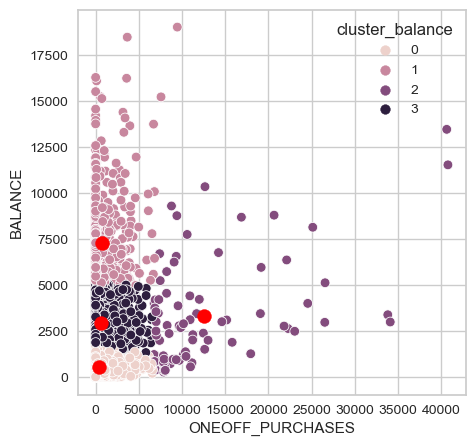

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

km = KMeans(n_clusters=4, init='k-means++', random_state=64)
km.fit(df[['ONEOFF_PURCHASES','BALANCE']])
# fit의 순서에 의해서 위치가 좌표값의 인덱스가 결정된다
#centroids : 0번째는 ONEOFF..의 좌표값, 1번째는 BALANCE의 좌표값이 들어간다
centroids = km.cluster_centers_
df['cluster_balance'] = km.labels_

plt.figure(figsize=(5,5))

sns.scatterplot(data=df, x="ONEOFF_PURCHASES", y="BALANCE", hue='cluster_balance')
plt.scatter(x=centroids[:,0], y=centroids[:,1], c='red', s=100)

##### 결론
* 0 그룹 : 계정에 잔액이 조금 있더라도 물건을 살 경우 카드 또는 현금으로 충당하여 사는 그룹이다
* 1 그룹 : 계정에 잔액이 많이 있으며 비싼 물건은 안사는 그룹으로 보인다
* 2 그룹 : 0 그룹과 비슷하게 계정에 있는 잔액보다 비싼 물건을 사는 그룹이며, 고가의 물건을 많이 사는 그룹이다
* 3 그룹 : 계정에 잔액 안에서 물건을 구매하는 그룹이다

### 그룹별 결제대상 확인
* PURCHASES(계정에서 구매 한 금액)
* PAYMENTS(신용카드 지불한 금액)
* CASH_ADVANCE(선불로 지급한 현금)

In [94]:
df.groupby('cluster_balance').count()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
cluster_balance,,,,,,,,,,,,,,,,,,,
0,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316,6316
1,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634
2,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
3,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915


In [95]:
df_out = df.groupby('cluster_balance').sum()[['PURCHASES','PAYMENTS','CASH_ADVANCE']].reset_index()
df_out

,cluster_balance,PURCHASES,PAYMENTS,CASH_ADVANCE
0,0,4797020.34,7.730121e+06,2.679057e+06
1,1,927905.36,2.394234e+06,2.506195e+06
2,2,1256930.81,1.149540e+06,5.291532e+04
3,3,1996826.75,4.237742e+06,3.522728e+06


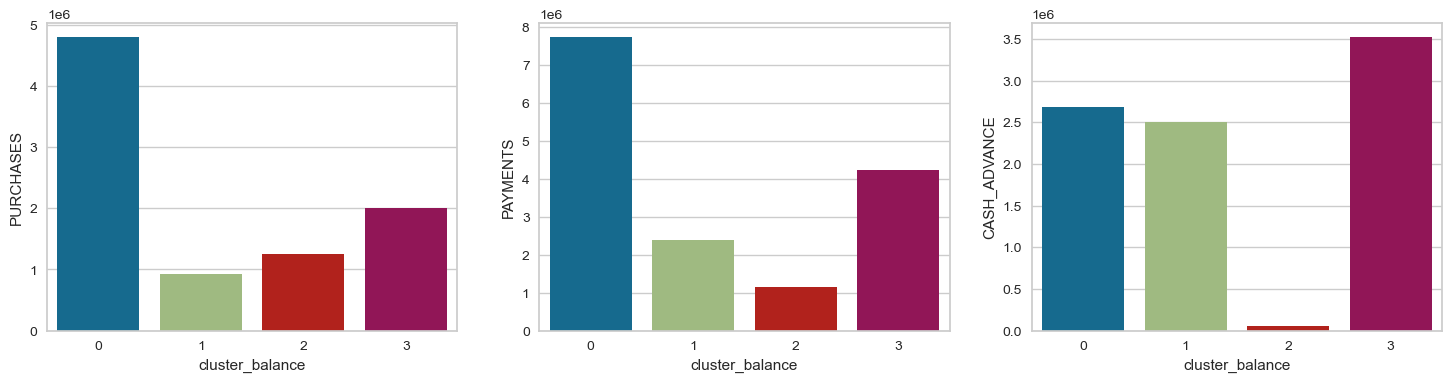

In [96]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(data=df_out, x='cluster_balance', y='PURCHASES' );
plt.subplot(1,3,2)
sns.barplot(data=df_out, x='cluster_balance', y='PAYMENTS');
plt.subplot(1,3,3)
sns.barplot(data=df_out, x='cluster_balance', y='CASH_ADVANCE');

#### 결론
* 돈을 가장 많이 쓰는 그룹은 0번 그룹이며, 다음으로 3번 그룹이 많이 쓴다는 것을 알 수 있다.
* PURCHASES(계정에서 구매 한 금액) : 계정에서 구매하는 고객군은 0번 그룹이다
* PAYMENTS(신용카드 지불한 금액) : 신용카드를 사용하는 고객군 역시 0번 그룹이다
* CASH_ADVANCE(선불로 지급한 현금) : 선불로 지급하는 고객군은 3번 그룹이 월등이 높다.
>
* 해당 결제 수단을 보고 각각의 이벤트를 발생시켜 소비자로 하여금 지출을 유발 시키면 될 것이다.